In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
import pickle 
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from ast import literal_eval


set_config(display='diagram')
%matplotlib inline

In [6]:
data = pd.read_csv('tmdb_movie_info.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6659 non-null   int64  
 1   adult              6659 non-null   bool   
 2   backdrop_path      6588 non-null   object 
 3   genre_ids          6659 non-null   object 
 4   id                 6659 non-null   int64  
 5   original_language  6659 non-null   object 
 6   original_title     6659 non-null   object 
 7   overview           6651 non-null   object 
 8   popularity         6659 non-null   float64
 9   poster_path        6640 non-null   object 
 10  release_date       6659 non-null   object 
 11  title              6659 non-null   object 
 12  video              6659 non-null   bool   
 13  vote_average       6659 non-null   float64
 14  vote_count         6659 non-null   int64  
 15  genres             6659 non-null   object 
 16  top_cast           6659 

In [8]:
data

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,top_cast,keywords
0,0,False,/pxJbfnMIQQxCrdeLD0zQnWr6ouL.jpg,"[28, 35, 53]",1077280,en,Die Hart,"Follow a fictionalized version of Kevin Hart, ...",2687.814,/1EnBjTJ5utgT1OXYBZ8YwByRCzP.jpg,2023-02-24,Die Hart,False,6.3,155,"['Action', 'Comedy', 'Thriller']","['Kevin Hart', 'John Travolta', 'Nathalie Emma...",[]
1,1,False,/22z44LPkMyf5nyyXvv8qQLsbom.jpg,"[27, 9648, 53]",631842,en,Knock at the Cabin,"While vacationing at a remote cabin, a young g...",2476.126,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,2023-02-03,Knock at the Cabin,False,6.5,959,"['Horror', 'Mystery', 'Thriller']","['Dave Bautista', 'Jonathan Groff', 'Ben Aldri...","['based on novel or book', 'sacrifice', 'cabin..."
2,2,False,/jr8tSoJGj33XLgFBy6lmZhpGQNu.jpg,"[16, 12, 35, 10751]",315162,en,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,2700.624,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,2022-12-21,Puss in Boots: The Last Wish,False,8.4,4453,"['Adventure', 'Animation', 'Comedy', 'Family']","['Antonio Banderas', 'Salma Hayek', 'Harvey Gu...","['fairy tale', 'talking dog', 'spin off', 'aft..."
3,3,False,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,"[28, 12, 878]",505642,en,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2361.671,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,2022-11-11,Black Panther: Wakanda Forever,False,7.3,4004,"['Action', 'Adventure', 'Science Fiction']","['Letitia Wright', ""Lupita Nyong'o"", 'Danai Gu...","['loss of loved one', 'hero', 'sequel', 'super..."
4,4,False,/AsEgGeccI32SwMBkxpwhOkhbzmF.jpg,"[28, 878, 53, 27]",1011679,en,Shark Side of the Moon,"Decades ago, the USSR developed unkillable sha...",2070.625,/v5CfpzxoJDkZxjZAizClFdlEF0U.jpg,2022-08-12,Shark Side of the Moon,False,5.3,70,"['Action', 'Horror', 'Science Fiction', 'Thril...","['Maxi Witrak', 'Ego Mikitas', 'Michael Marcel...","['moon', 'shark attack', 'inspiration', 'astro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,6654,False,/2sZ3SYWN4ApotMkDyG79Y5YkAhP.jpg,"[35, 18]",10699,en,Hero,Bernie Laplante is having a rough time. He's d...,14.479,/wD7D0B9U9ooanxyhtgLKaqM7www.jpg,1992-10-02,Hero,False,6.4,389,"['Comedy', 'Drama']","['Dustin Hoffman', 'Geena Davis', 'Andy García...","['identity', 'custody battle', 'jinx', 'report..."
6655,6655,False,/iphK3NP0bmQbLV4SndaOdpVBYgv.jpg,"[18, 35, 14]",12797,en,Ghost Town,"Bertram Pincus, a cranky, people-hating Manhat...",12.480,/b8VS14DwpLlugTxVWSllYU0Gjn5.jpg,2008-09-19,Ghost Town,False,6.5,837,"['Comedy', 'Drama', 'Fantasy']","['Ricky Gervais', 'Greg Kinnear', 'Téa Leoni',...","['new york city', 'life and death', 'adultery'..."
6656,6656,False,/rDisgVROM22D7bs5SCbmOAUYmm1.jpg,"[18, 10402, 9648, 10749]",15392,en,Crossroads,A wanna-be blues guitar virtuoso seeks a long-...,13.728,/2sMo7gwZ8L7KttiW210T0ueJ2eX.jpg,1986-03-14,Crossroads,False,7.4,345,"['Drama', 'Music', 'Mystery', 'Romance']","['Ralph Macchio', 'Joe Seneca', 'Jami Gertz', ...","['harmonica', 'blues', 'guitar duel']"
6657,6657,False,/q7sl4qm8WlogrZ3cJxzuN8WejM1.jpg,[18],160588,en,Blue Jasmine,"After experiencing a traumatic misfortune, Jas...",13.232,/zLdLiUJfueZBctdv8OvkmGXEHEC.jpg,2013-08-23,Blue Jasmine,False,7.0,3119,['Drama'],"['Alec Baldwin', 'Cate Blanchett', 'Louis C.K....","['new york city', 'sibling relationship', 'san..."


In [9]:
data = data.drop(columns=['adult','video','backdrop_path','poster_path','Unnamed: 0', 'release_date', 'original_title'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          6659 non-null   object 
 1   id                 6659 non-null   int64  
 2   original_language  6659 non-null   object 
 3   overview           6651 non-null   object 
 4   popularity         6659 non-null   float64
 5   title              6659 non-null   object 
 6   vote_average       6659 non-null   float64
 7   vote_count         6659 non-null   int64  
 8   genres             6659 non-null   object 
 9   top_cast           6659 non-null   object 
 10  keywords           6659 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 572.4+ KB


In [11]:
data.isnull().sum()

genre_ids            0
id                   0
original_language    0
overview             8
popularity           0
title                0
vote_average         0
vote_count           0
genres               0
top_cast             0
keywords             0
dtype: int64

In [12]:
data['genres']

0                        ['Action', 'Comedy', 'Thriller']
1                       ['Horror', 'Mystery', 'Thriller']
2          ['Adventure', 'Animation', 'Comedy', 'Family']
3              ['Action', 'Adventure', 'Science Fiction']
4       ['Action', 'Horror', 'Science Fiction', 'Thril...
                              ...                        
6654                                  ['Comedy', 'Drama']
6655                       ['Comedy', 'Drama', 'Fantasy']
6656             ['Drama', 'Music', 'Mystery', 'Romance']
6657                                            ['Drama']
6658            ['Action', 'Comedy', 'Crime', 'Thriller']
Name: genres, Length: 6659, dtype: object

In [13]:
def clean_data(x):
     x = str.lower(x)
     x = x.translate(str.maketrans('','',string.punctuation))
     return x


In [14]:
clean_data("Haris Naveed")

'haris naveed'

In [15]:
features = ['keywords','genres','top_cast']
data['overview'] = data['overview'].astype(str)
for feature in features:
    data[feature] = data[feature].apply(clean_data)
    

In [16]:
def create_soup(x):
    return ''.join(x['keywords']) + ' ' + ''.join(x['top_cast']) + ' ' + ''.join(x['genres'])
data['soup'] = data.apply(create_soup, axis=1)

In [17]:
data['soup'][1]

'based on novel or book sacrifice cabin faith end of the world apocalypse home invasion lgbt aftercreditsstinger adopted child adopted daughter shot on film gay same sex relationship religious symbolism dave bautista jonathan groff ben aldridge kristen cui nikki amukabird rupert grint abby quinn clare louise frost mckenna kerrigan odera adimorah horror mystery thriller'

In [18]:
indices = pd.Series(data.index, index=[data['keywords'], data['genres'], data['top_cast']])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['soup'])

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_average', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_count', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='vote_average'>,
        <AxesSubplot:xlabel='vote_average', ylabel='vote_average'>,
        <AxesSubplot:xlabel='vote_count', ylabel='vote_average'>],
       [<AxesSubplot:xlabel='popularity', ylabel='vote_count'>,
        <AxesSubplot:xlabel='vote_average', ylabel='vote_count'>,
        <AxesSubplot:xlabel='vote_count', ylabel='vote_count'>]],
      dtype=object)

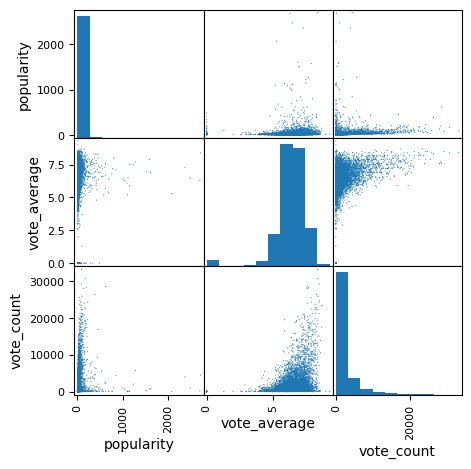

In [20]:
num_features = ['popularity', 'vote_average', 'vote_count']
pd.plotting.scatter_matrix(data[num_features], figsize=(5, 5), s=3, alpha=0.8)

<AxesSubplot:>

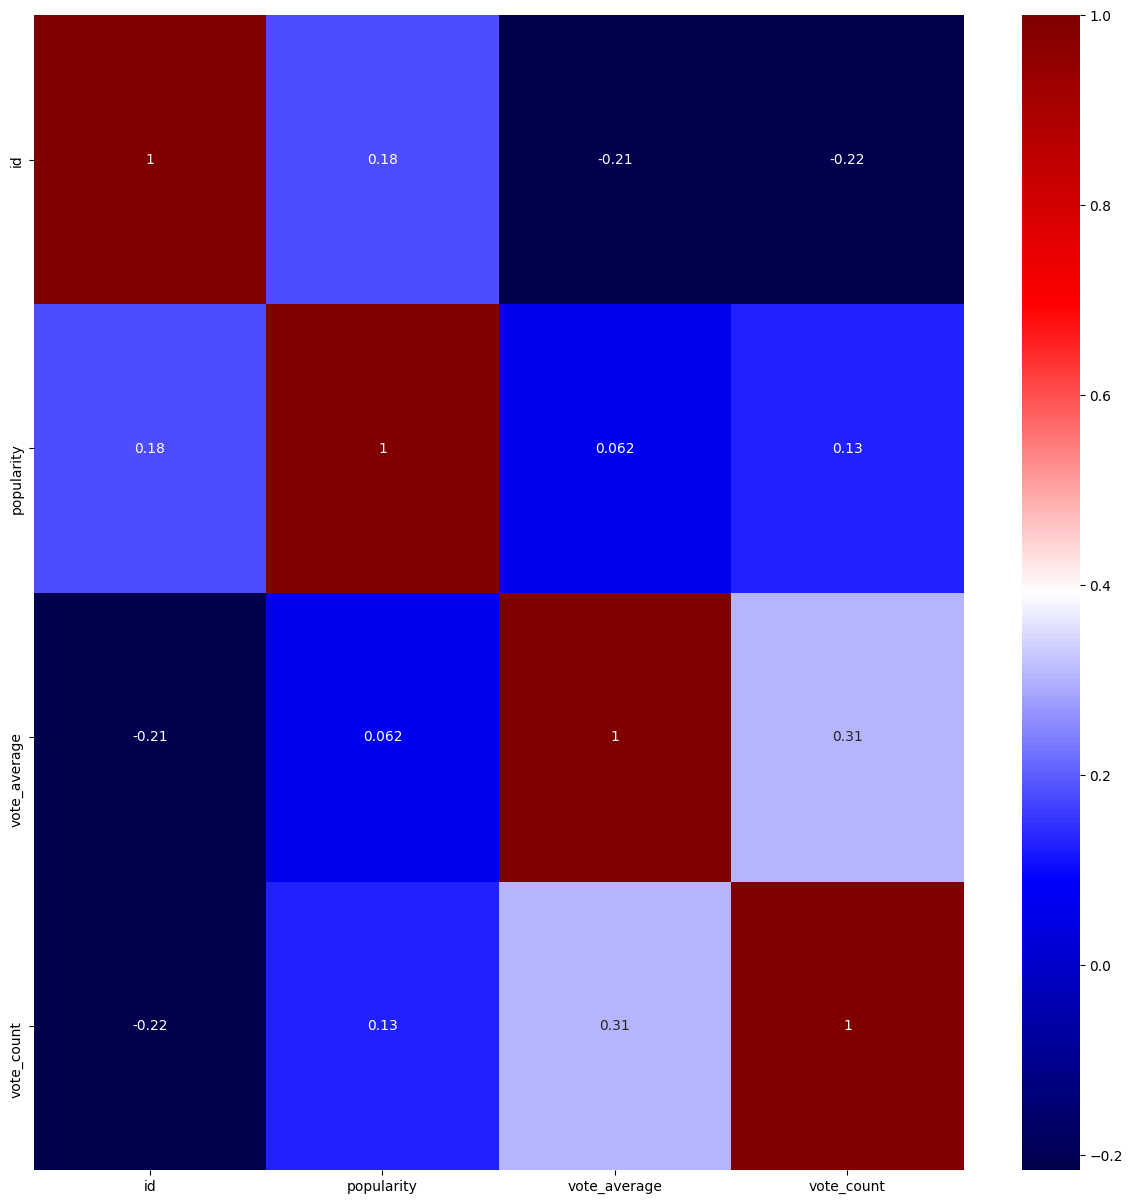

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap='seismic', annot=True)

In [22]:
data.describe()

,id,popularity,vote_average,vote_count
count,6.659000e+03,6659.000000,6659.000000,6659.000000
mean,2.481633e+05,39.940922,6.384652,2073.240426
std,3.067560e+05,99.016553,1.236688,3271.070168
min,5.000000e+00,7.738000,0.000000,0.000000
25%,1.033650e+04,16.369000,6.000000,280.000000
50%,5.720100e+04,21.644000,6.500000,890.000000
75%,4.530165e+05,35.105500,7.100000,2382.000000
max,1.094721e+06,2700.624000,9.300000,33311.000000


In [30]:
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:20]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

In [24]:
data

,genre_ids,id,original_language,overview,popularity,title,vote_average,vote_count,genres,top_cast,keywords,soup
0,"[28, 35, 53]",1077280,en,"Follow a fictionalized version of Kevin Hart, ...",2687.814,Die Hart,6.3,155,action comedy thriller,kevin hart john travolta nathalie emmanuel jea...,,kevin hart john travolta nathalie emmanuel je...
1,"[27, 9648, 53]",631842,en,"While vacationing at a remote cabin, a young g...",2476.126,Knock at the Cabin,6.5,959,horror mystery thriller,dave bautista jonathan groff ben aldridge kris...,based on novel or book sacrifice cabin faith e...,based on novel or book sacrifice cabin faith e...
2,"[16, 12, 35, 10751]",315162,en,Puss in Boots discovers that his passion for a...,2700.624,Puss in Boots: The Last Wish,8.4,4453,adventure animation comedy family,antonio banderas salma hayek harvey guillén wa...,fairy tale talking dog spin off aftercreditsst...,fairy tale talking dog spin off aftercreditsst...
3,"[28, 12, 878]",505642,en,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",2361.671,Black Panther: Wakanda Forever,7.3,4004,action adventure science fiction,letitia wright lupita nyongo danai gurira wins...,loss of loved one hero sequel superhero based ...,loss of loved one hero sequel superhero based ...
4,"[28, 878, 53, 27]",1011679,en,"Decades ago, the USSR developed unkillable sha...",2070.625,Shark Side of the Moon,5.3,70,action horror science fiction thriller,maxi witrak ego mikitas michael marcel tania f...,moon shark attack inspiration astronaut shark ...,moon shark attack inspiration astronaut shark ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6654,"[35, 18]",10699,en,Bernie Laplante is having a rough time. He's d...,14.479,Hero,6.4,389,comedy drama,dustin hoffman geena davis andy garcía joan cu...,identity custody battle jinx reporter exwife l...,identity custody battle jinx reporter exwife l...
6655,"[18, 35, 14]",12797,en,"Bertram Pincus, a cranky, people-hating Manhat...",12.480,Ghost Town,6.5,837,comedy drama fantasy,ricky gervais greg kinnear téa leoni billy cam...,new york city life and death adultery bus egyp...,new york city life and death adultery bus egyp...
6656,"[18, 10402, 9648, 10749]",15392,en,A wanna-be blues guitar virtuoso seeks a long-...,13.728,Crossroads,7.4,345,drama music mystery romance,ralph macchio joe seneca jami gertz joe morton...,harmonica blues guitar duel,harmonica blues guitar duel ralph macchio joe ...
6657,[18],160588,en,"After experiencing a traumatic misfortune, Jas...",13.232,Blue Jasmine,7.0,3119,drama,alec baldwin cate blanchett louis ck bobby can...,new york city sibling relationship san francis...,new york city sibling relationship san francis...


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [26]:
data = data.reset_index()
indices = pd.Series(data.index, index=data['title'])

In [31]:
get_recommendations('Bullet to the Head', cosine_sim2)

82                                     Fast X
280                              Wrath of Man
1459                                 S.W.A.T.
719                                The Losers
1849                                 Blackhat
5531                          Avenging Angelo
4336                                    Crush
3806    The Fast and the Furious: Tokyo Drift
5775                                    Basic
4118              The Second Coming of Christ
1587                             House of Wax
5739                                Backtrace
1552                                    Cobra
5363                                 Raw Deal
5421                           Daphne & Velma
1605                        The Expendables 4
2259                                      War
3782              Escape Plan: The Extractors
682                           The Expendables
Name: title, dtype: object

In [29]:
data[data['title']=='Fast X']

,index,genre_ids,id,original_language,overview,popularity,title,vote_average,vote_count,genres,top_cast,keywords,soup
82,82,"[28, 80, 53]",385687,en,Over many missions and against impossible odds...,289.307,Fast X,0.0,0,action crime thriller,vin diesel michelle rodriguez tyrese gibson lu...,sequel racing family,sequel racing family vin diesel michelle rodri...
